# Visualizing the fitting of a model

This is a note from some cool tricks I picked up from a Grid Search Lab I did in Udacity's Machine Learning Nanodegree course.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

First we generate some random "hittepå"-data (or load if you have some laying around...).<br>
300 Normal/gaussian distribution centered around 0 and scaled up 100.. just because..<br>

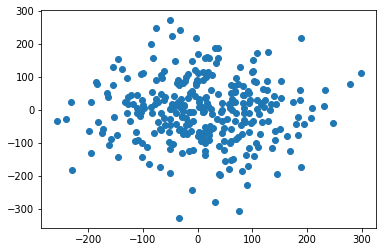

In [2]:
r = np.random.normal(loc=0, scale=100, size=(300,2))
plt.scatter(r[:,0],r[:,1])
plt.show()

Create some "truth" about this x,y featured data.<br>
Our x, y 'features' and a list of truths that we want to separate and predict.<br>
As the data already in the format we want we just refer to it as features.
As positive we spit out a random centrod and class all points within some radius.

In [3]:
features = r

centroid = np.random.randint(-250,250, size=2)
truths = []
for xy in features:
    include = np.sqrt(np.sum(np.square(centroid-xy))) < 100
    truths.append(include)
truths = np.array(truths)

#### plot our data.
first all False dots by argwhere which returns indices.<br>
We want these in a flat list so flatten().<br>
Then all True.

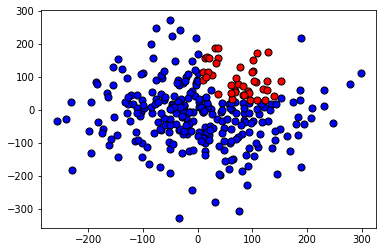

In [4]:

false_x = features[np.argwhere(truths==False).flatten(),0]
false_y = features[np.argwhere(truths==False).flatten(),1]
true_x = features[np.argwhere(truths==True).flatten(),0]
true_y = features[np.argwhere(truths==True).flatten(),1]


plt.scatter( false_x, false_y, s = 50, color = 'blue', edgecolor = 'k' )
plt.scatter( true_x, true_y, s = 50, color = 'red', edgecolor = 'k' )
plt.show()

### Create some model to try to predict our data

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, fbeta_score

#Fixing a random seed
import random
random.seed(42)

# Split the data into training and 20% random sampled testing sets.
train_features, test_features, train_truths, test_truths = train_test_split(features, truths, test_size=0.2, random_state=42)

In [6]:
# In this case we use a Decision Tree Classifier as demo
from sklearn.tree import DecisionTreeClassifier

# Define the model (with default hyperparameters)
clf = DecisionTreeClassifier(random_state=42)

# Fit the model
clf.fit(train_features, train_truths)

# Make predictions
train_predictions = clf.predict(train_features)
test_predictions = clf.predict(test_features)

### Then for the visulazation of the model.

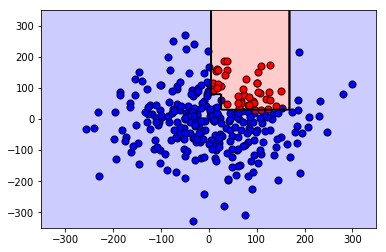

In [7]:
# First plot all positive / negative dots as before
plt.scatter(
    features[np.argwhere(truths==False).flatten(),0], 
    features[np.argwhere(truths==False).flatten(),1],
    s = 50, color = 'blue', edgecolor = 'k')
plt.scatter(
    features[np.argwhere(truths==True).flatten(),0], 
    features[np.argwhere(truths==True).flatten(),1],
    s = 50, color = 'red', edgecolor = 'k')

# then we create a 300 by 300 grid that represents our visual space
r = np.linspace(-350,350,300)
s,t = np.meshgrid(r,r)

# we have rows of x (s), y (t), but want a list of [x,y] so..
# first reshape into 1D lists 
s = np.reshape(s,(np.size(s),1))
t = np.reshape(t,(np.size(t),1))
# then concatenate on axis 1 ( s column1, t column2 )
h = np.concatenate((s,t),1)


# predicts each grid-point through our model
z = clf.predict(h)

# Then turn into rows of x, y and if true or false (z)
s = s.reshape((np.size(r),np.size(r)))
t = t.reshape((np.size(r),np.size(r)))
z = z.reshape((np.size(r),np.size(r)))

# Specify x (s), y (t), and what should be colored blue or red
plt.contourf(s,t,z,colors = ['blue','red'],alpha = 0.2,levels = range(-1,2))
# Draw a contour if the are wont be to small
if len(np.unique(z)) > 1:
    plt.contour(s,t,z,colors = 'k', linewidths = 1)


plt.show()

#### Out ff curiosity, how did our model do? :)

In [8]:
print('Training F1 Score: ', f1_score(train_predictions, train_truths))
print('Testing F1 Score: ', f1_score(test_predictions, test_truths))

Training F1 Score:  1.0
Testing F1 Score:  0.933333333333
